<a href="https://colab.research.google.com/github/biggiesmalls2/LS-2024-Machine-learningww/blob/main/CNN_final_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/drive/MyDrive/data',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1657 files belonging to 4 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch=data_iterator.next()

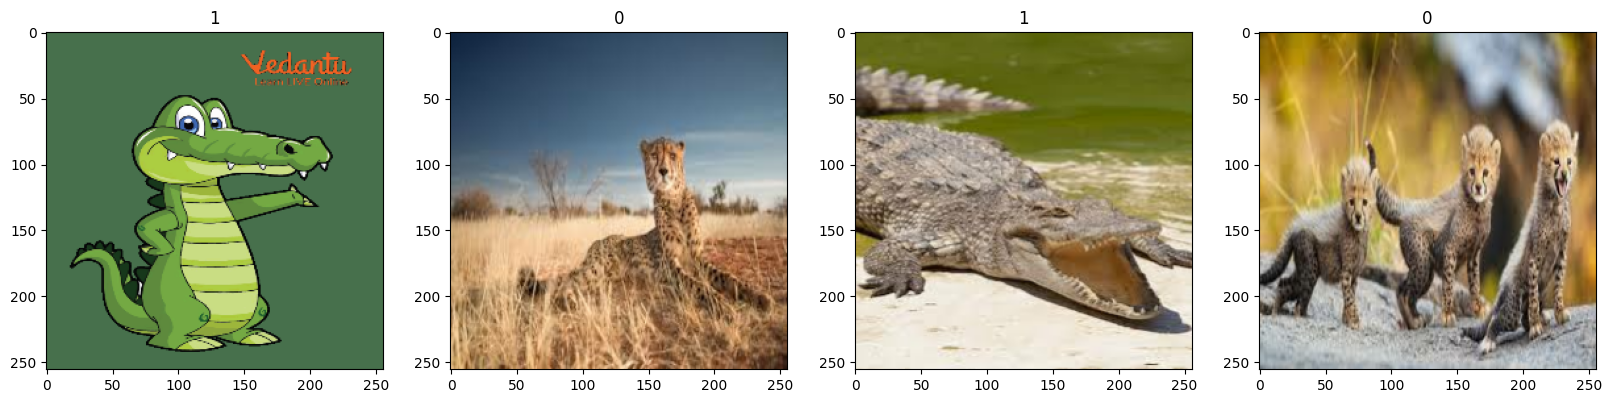

In [14]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [15]:
normalization_layer = layers.Rescaling(1./255)
data=data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(data))
first_image = image_batch[0]

In [16]:
# Calculate number of batches
total_batches = tf.data.experimental.cardinality(data).numpy()

# Ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Calculate number of batches for train, validation, and test sets
train_batches = int(total_batches * train_ratio)
val_batches = int(total_batches * val_ratio)
test_batches = int(total_batches * test_ratio)

# Split the dataset
train_data = data.take(train_batches)
val_data = data.skip(train_batches).take(val_batches)
test_data = data.skip(train_batches + val_batches).take(test_batches)


In [17]:

input_shape = (256, 256, 3)

# Number of classes for classification (e.g., 10 classes)
num_classes = 4

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])




In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    verbose=1
)


Epoch 1/10
36/36 [==============================] - 134s 4s/step - loss: 2.3221 - accuracy: 0.2917 - val_loss: 1.3460 - val_accuracy: 0.3656
Epoch 2/10
36/36 [==============================] - 122s 3s/step - loss: 1.2446 - accuracy: 0.4297 - val_loss: 1.1774 - val_accuracy: 0.4375
Epoch 3/10
36/36 [==============================] - 121s 3s/step - loss: 0.8713 - accuracy: 0.6510 - val_loss: 0.7677 - val_accuracy: 0.7125
Epoch 4/10
36/36 [==============================] - 148s 4s/step - loss: 0.4982 - accuracy: 0.8498 - val_loss: 0.7007 - val_accuracy: 0.7437
Epoch 5/10
36/36 [==============================] - 124s 3s/step - loss: 0.2674 - accuracy: 0.9314 - val_loss: 0.5444 - val_accuracy: 0.8125
Epoch 6/10
36/36 [==============================] - 128s 3s/step - loss: 0.1716 - accuracy: 0.9627 - val_loss: 0.5346 - val_accuracy: 0.8188
Epoch 7/10
36/36 [==============================] - 126s 3s/step - loss: 0.0685 - accuracy: 0.9878 - val_loss: 0.4897 - val_accuracy: 0.8594
Epoch 8/10
36

In [23]:
loss,accuracy=model.evaluate(test_data, verbose=2)


5/5 - 20s - loss: 1.0068 - accuracy: 0.8000 - 20s/epoch - 4s/step


In [24]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Try again, not enough accuracy! Your accuracy is 0.800000011920929
